In [48]:
!pip install treelib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
!pip install chord

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import plotly.express as px
import squarify

In [52]:
df_all = pd.read_excel("/content/Long1973-2021_Relabel.xlsx", sheet_name = 1)

In [53]:
df_all.head(2)

,INSTNAME,UNITID,AllUpdates,STATE,CITY,YEAR,VALUE,YrValKey,CATEGORY,IDYrKey,SubCatLbl,GrpLbl,Status,LinkUnit,Notes
0,Community College of the Air Force,100636,0,AL,Maxwell AFB,1976,40,197640,5,1171951994,Two-Year Colleges and Institutes,Associates,NaN,NaN,NaN
1,Community College of the Air Force,100636,0,AL,Maxwell AFB,1987,40,198740,5,1350812005,"Two-Year, Community, Junior and Technical Coll...",Associates,NaN,NaN,NaN


In [54]:
years = df_all['YEAR'].unique()
years

array([1976, 1987, 1994, 2000, 2005, 2010, 1973, 2015, 2018, 2021])

In [55]:
group_by_inst_ = df_all.groupby(['GrpLbl']).size().reset_index(name='count')
group_by_inst_

,GrpLbl,count
0,Associates,13065
1,Bacc/Assoc,1380
2,Bachelor's,6021
3,Doctoral,2856
4,Master's,6198
5,SF: 2Yr,1219
6,SF: 4Yr,7538


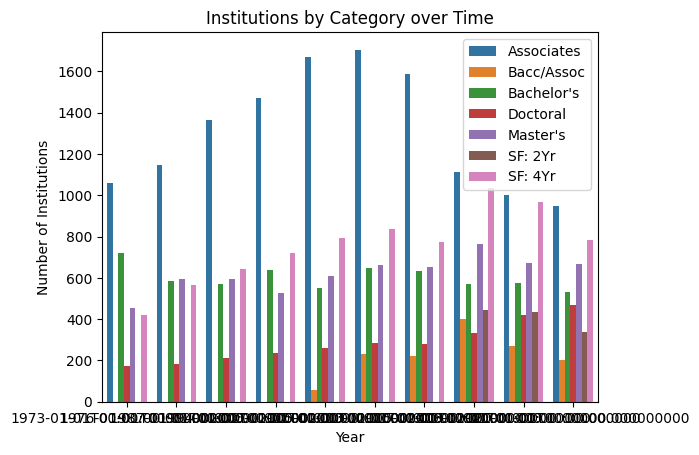

In [56]:
df_all['YEAR'] = pd.to_datetime(df_all['YEAR'], format='%Y')

# Group the data by category and year, and count the number of institutions in each group
grouped_data = df_all.groupby(['GrpLbl', 'YEAR'])['UNITID'].count().reset_index()

# Create a bar chart with separate bars for each category and stacked bars for each year
sns.barplot(x='YEAR', y='UNITID', hue='GrpLbl', data=grouped_data)

# Customize the graph
plt.title('Institutions by Category over Time')
plt.xlabel('Year')
plt.ylabel('Number of Institutions')
plt.legend()

# Show the graph
plt.show()


<ipython-input-57-d38b867cfc1d>:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



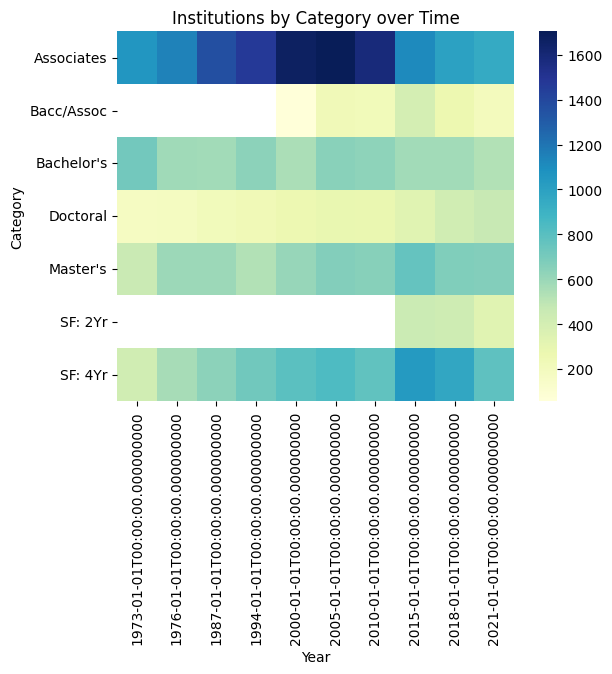

In [57]:
df_all['YEAR'] = pd.to_datetime(df_all['YEAR'], format='%Y')

# Group the data by category and year, and count the number of institutions in each group
grouped_data = df_all.groupby(['GrpLbl', 'YEAR'])['UNITID'].count().reset_index()

# Pivot the data to create a table with years as columns and categories as rows
pivot_data = grouped_data.pivot('GrpLbl', 'YEAR', 'UNITID')

# Create a heat map of the pivot table
sns.heatmap(pivot_data, cmap='YlGnBu')

# Customize the graph
plt.title('Institutions by Category over Time')
plt.xlabel('Year')
plt.ylabel('Category')

# Show the graph
plt.show()


In [58]:
group_by_inst_ = df_all.groupby(['GrpLbl']).size().reset_index(name='count')
group_by_inst_

,GrpLbl,count
0,Associates,13065
1,Bacc/Assoc,1380
2,Bachelor's,6021
3,Doctoral,2856
4,Master's,6198
5,SF: 2Yr,1219
6,SF: 4Yr,7538


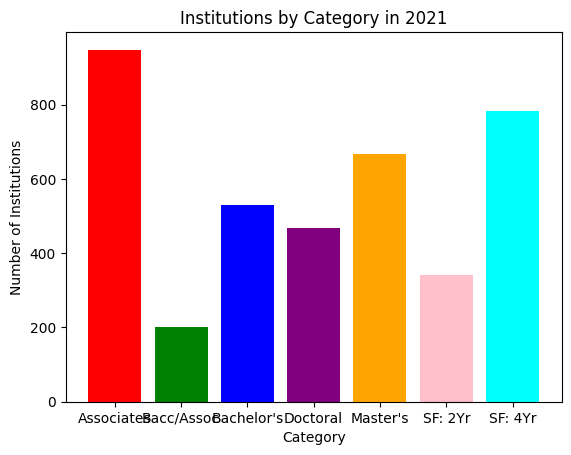

In [59]:
df_all['YEAR'] = pd.to_datetime(df_all['YEAR'], format='%Y')

# Set up the figure and axes for the animation
fig, ax = plt.subplots()

category_colors = {
    'Associates': 'red',
    'Bacc/Assoc': 'green',
    "Bachelor's": 'blue',
    'Doctoral': 'purple',
    "Master's": 'orange',
    'SF: 2Yr': 'pink',
    'SF: 4Yr': 'cyan',
}

# Define the update function for the animation
def update(num):
    ax.clear()
    year = df_all['YEAR'].unique()[num]
    year_data = df_all[df_all['YEAR'] == year]
    grouped_data = year_data.groupby('GrpLbl')['UNITID'].count()
    categories = grouped_data.index
    values = grouped_data.values
    colors = [category_colors[c] for c in categories]
    ax.bar(categories, values, color=colors)
    ax.set_title('Institutions by Category in '+ year.astype(str).split('-')[0])
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Institutions')

# Create the animation and assign it to a variable
ani = animation.FuncAnimation(fig, update, frames=len(df_all['YEAR'].unique()))


# Set up the writer for the animation
writer = animation.PillowWriter(fps=2)

# Save the animation as an animated GIF
ani.save('institution_data.gif', writer=writer)

# Show the animation
plt.show()

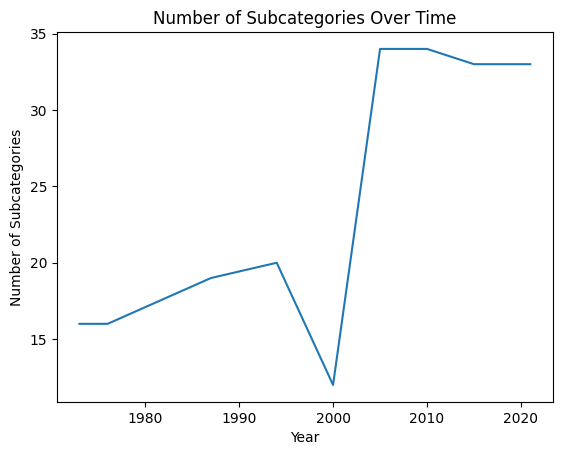

In [60]:
# Group the data by year and count the number of unique subcategories
grouped_data = df_all.groupby('YEAR')['SubCatLbl'].nunique()

# Set up the figure and axis
fig, ax = plt.subplots()

# Plot the data as a line graph
ax.plot(grouped_data.index, grouped_data.values)

# Set the title, x-label, y-label, and legend for the plot
ax.set_title('Number of Subcategories Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Subcategories')

# Display the plot
plt.show()


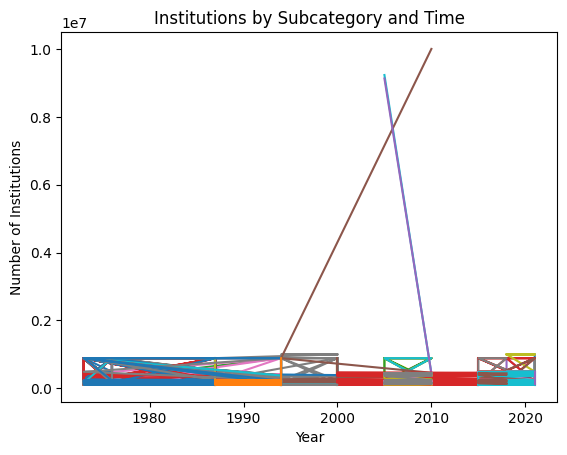

In [61]:
subcategories = df_all['SubCatLbl'].unique()

fig, ax = plt.subplots()
for subcategory in subcategories:
    subcategory_data = df_all[df_all['SubCatLbl'] == subcategory]
    ax.plot(subcategory_data['YEAR'], subcategory_data['UNITID'], label=subcategory)


ax.set_title('Institutions by Subcategory and Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Institutions')
#ax.legend()

# Display the plot
plt.show()


<ipython-input-62-dc8935a10710>:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



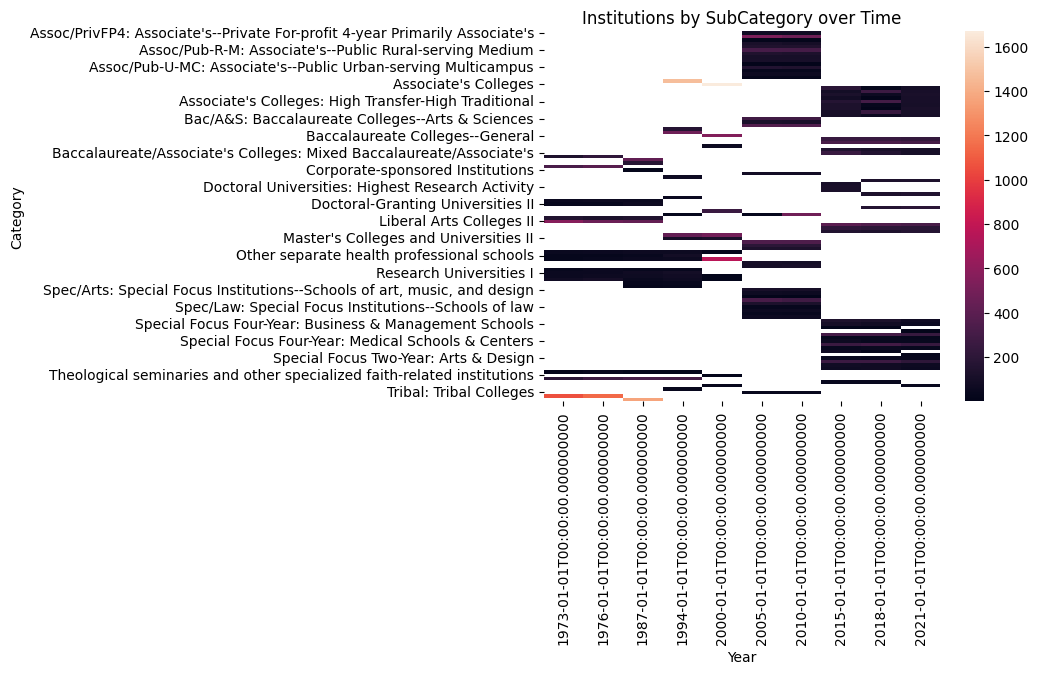

In [62]:
df_all['YEAR'] = pd.to_datetime(df_all['YEAR'], format='%Y')

# Group the data by category and year, and count the number of institutions in each group
grouped_data = df_all.groupby(['SubCatLbl', 'YEAR'])['UNITID'].count().reset_index()

# Pivot the data to create a table with years as columns and categories as rows
pivot_data = grouped_data.pivot('SubCatLbl', 'YEAR', 'UNITID')

# Create a heat map of the pivot table
sns.heatmap(pivot_data)

# Customize the graph
plt.title('Institutions by SubCategory over Time')
plt.xlabel('Year')
plt.ylabel('Category')

# Show the graph
plt.show()

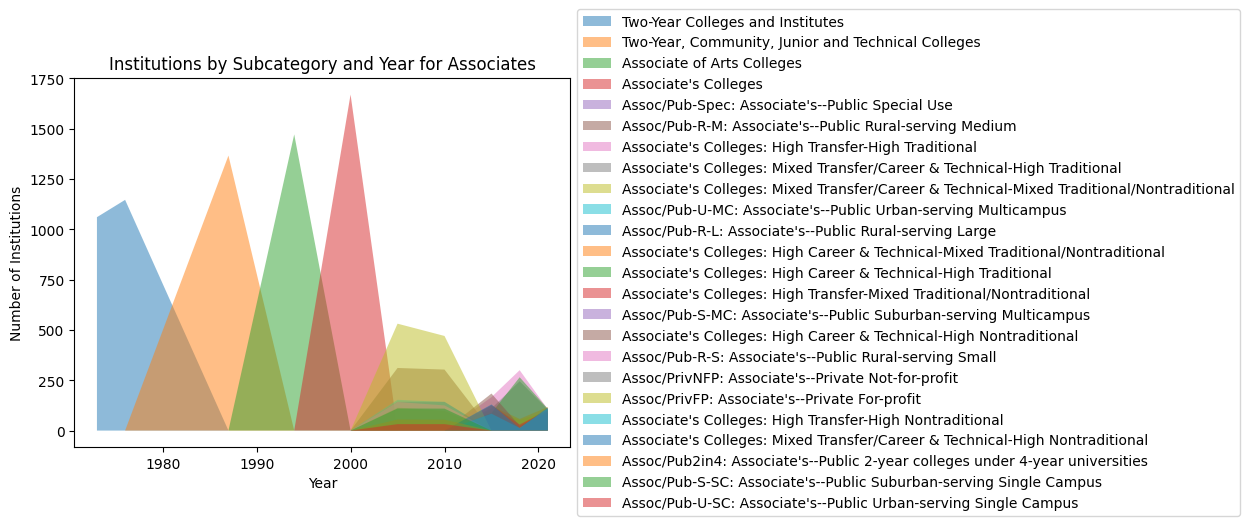

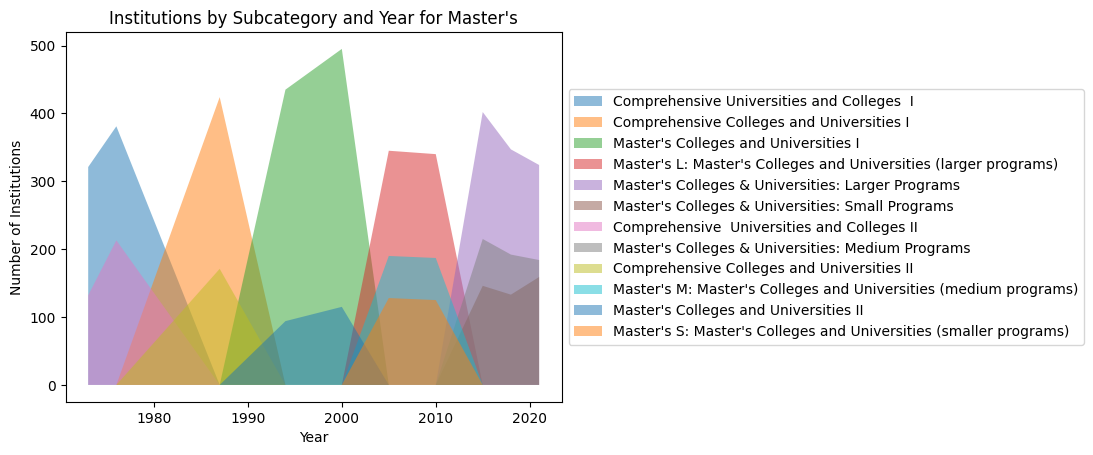

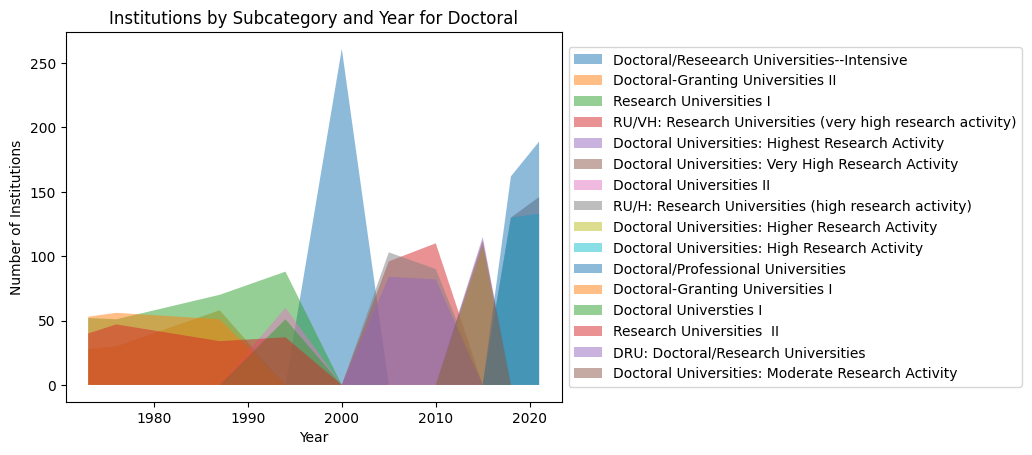

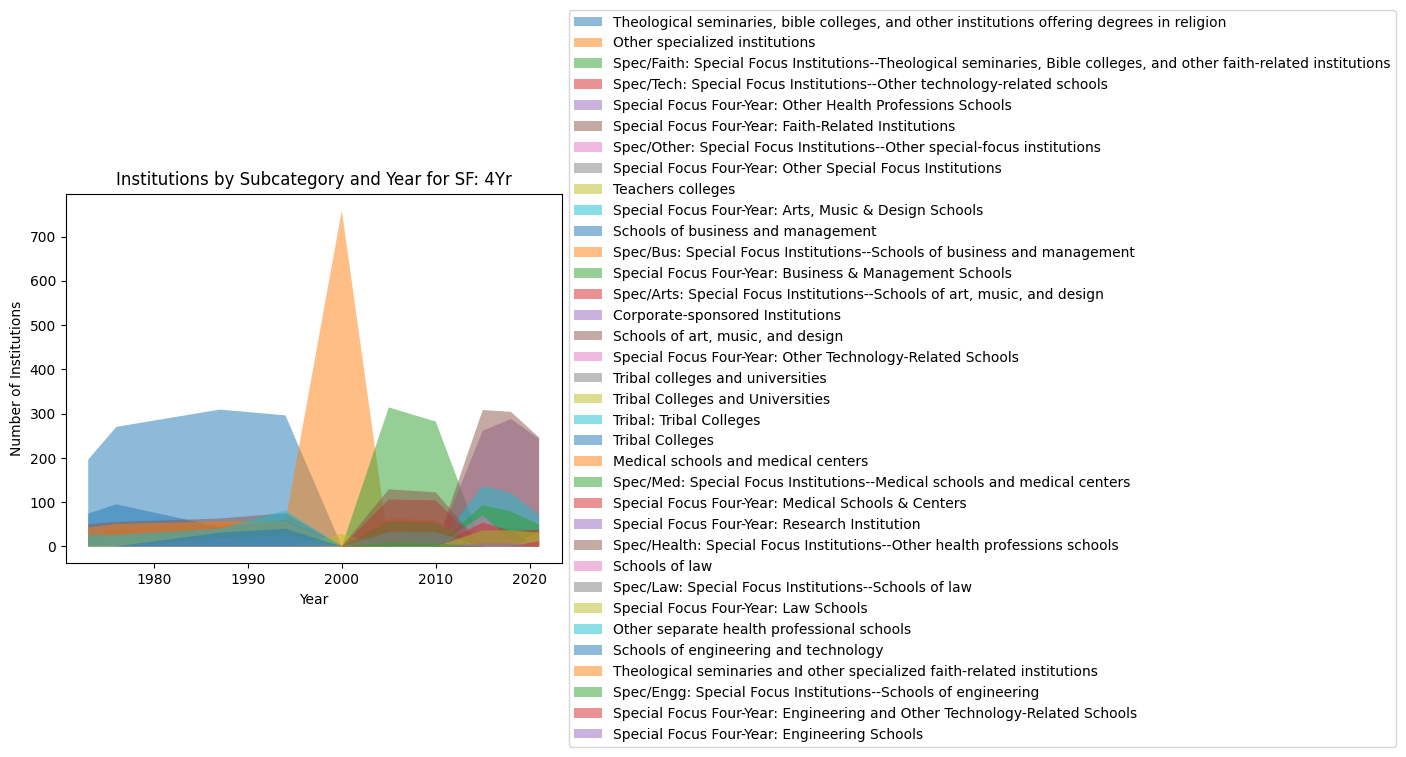

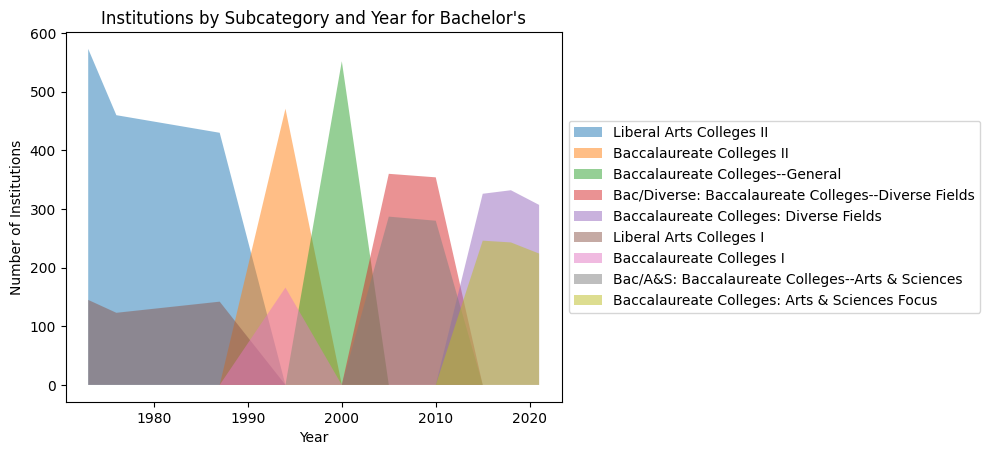

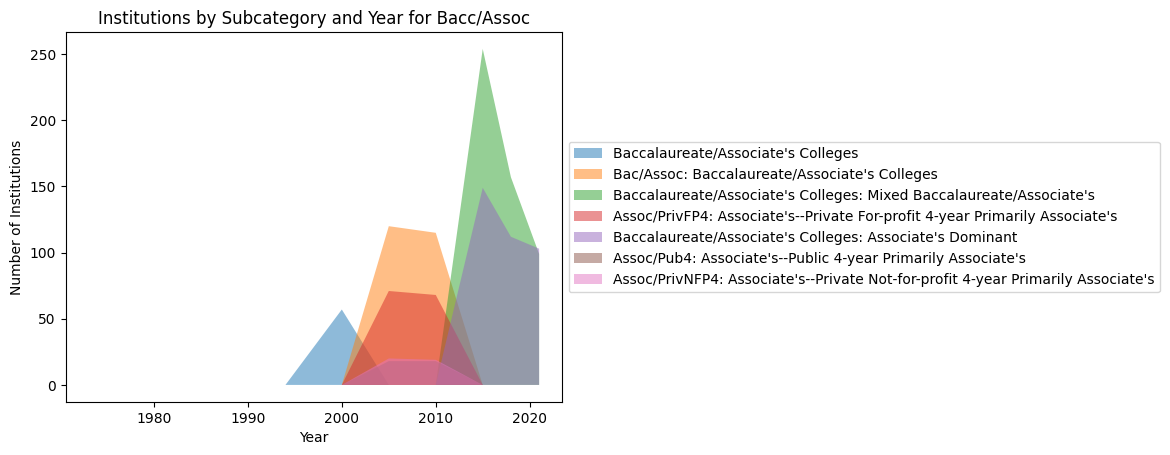

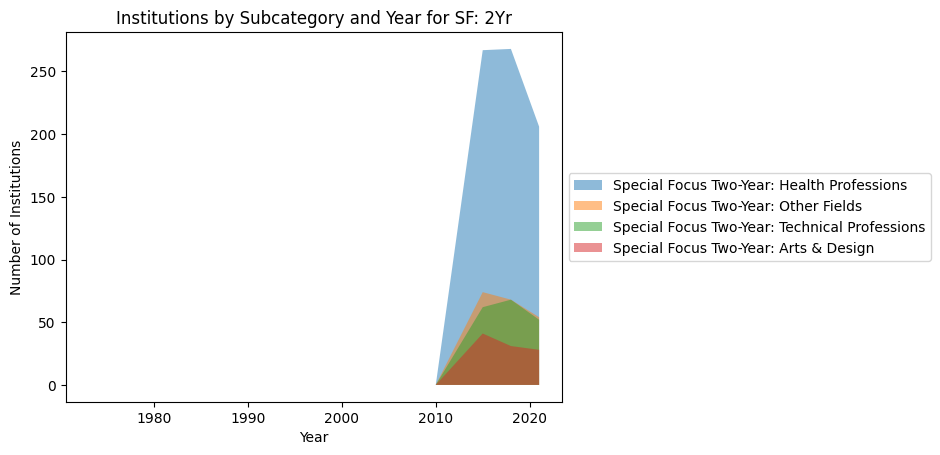

In [64]:
cleaned_data = df_all.dropna(subset = ['GrpLbl','SubCatLbl'])
years = df_all['YEAR'].unique()
grouped_data = cleaned_data.groupby(['GrpLbl', 'SubCatLbl', 'YEAR'])['UNITID'].count().reset_index()

pivoted_data = pd.pivot_table(grouped_data, index=['GrpLbl', 'SubCatLbl'], columns='YEAR', values='UNITID', fill_value=0)

for category in cleaned_data['GrpLbl'].unique():
    fig, ax = plt.subplots()

    subcategories = cleaned_data.loc[cleaned_data['GrpLbl'] == category, 'SubCatLbl'].unique()

    for subcategory in subcategories:
        data = pivoted_data.loc[(category, subcategory), :]
        ax.fill_between(data.index, data.values,
                                label=subcategory, alpha=0.5)
    
    ax.set_title(f'Institutions by Subcategory and Year for {category}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Institutions')
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    plt.show()


In [66]:
import pandas as pd
import plotly.express as px

counts = df_all.groupby(['GrpLbl', 'YEAR', 'SubCatLbl']).size().reset_index(name='Count')

fig = px.sunburst(counts, path=['YEAR', 'GrpLbl', 'SubCatLbl'], values='Count')

fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    title="Change of Subcategories Over the Years for an Institution"
)

fig.show()


In [67]:
import pandas as pd
from treelib import Node, Tree

tree = Tree()

tree.create_node('Categories', 'root')

for category in cleaned_data['GrpLbl'].unique():
    tree.create_node(category, category, parent='root')
    for subcategory in cleaned_data[cleaned_data['GrpLbl'] == category]['SubCatLbl'].unique():
        tree.create_node(subcategory, subcategory, parent=category)

years = cleaned_data['YEAR'].unique()

for year in years:
    data = cleaned_data[cleaned_data['YEAR'] == year]

    for index, row in data.iterrows():
        if not tree.contains(row['UNITID']):
            tree.create_node(row['UNITID'], row['UNITID'], parent=row['SubCatLbl'], data={'YEAR': [year]})
        else:
            years_list = tree.get_node(row['UNITID']).data['YEAR']
            years_list.append(year)
            tree.update_node(row['UNITID'], data={'YEAR': years_list})

tree.show()


Categories
├── Associates
│   ├── Assoc/PrivFP: Associate's--Private For-profit
│   │   ├── 103893
│   │   ├── 103909
│   │   ├── 103927
│   │   ├── 103945
│   │   ├── 105534
│   │   ├── 105543
│   │   ├── 110325
│   │   ├── 114390
│   │   ├── 114415
│   │   ├── 122694
│   │   ├── 122834
│   │   ├── 122852
│   │   ├── 123642
│   │   ├── 123679
│   │   ├── 124432
│   │   ├── 124937
│   │   ├── 127839
│   │   ├── 132806
│   │   ├── 135957
│   │   ├── 136011
│   │   ├── 140003
│   │   ├── 142054
│   │   ├── 145239
│   │   ├── 151157
│   │   ├── 151625
│   │   ├── 152424
│   │   ├── 154767
│   │   ├── 161776
│   │   ├── 163736
│   │   ├── 164058
│   │   ├── 176549
│   │   ├── 178183
│   │   ├── 179511
│   │   ├── 181756
│   │   ├── 189565
│   │   ├── 189653
│   │   ├── 193672
│   │   ├── 197832
│   │   ├── 202204
│   │   ├── 205054
│   │   ├── 205391
│   │   ├── 205522
│   │   ├── 205531
│   │   ├── 205692
│   │   ├── 205708
│   │   ├── 205717
│   │   ├── 211316
│   │   ├── 211325
│   │   

In [70]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

categories = cleaned_data['GrpLbl'].unique()
subcategories = cleaned_data['SubCatLbl'].unique()

# Create a grouped bar trace for each category
traces = []
for category in categories:
    df = cleaned_data[cleaned_data['GrpLbl'] == category]
    subcategory_values = [df[df['SubCatLbl'] == subcategory]['UNITID'].sum() for subcategory in subcategories]
    trace = go.Bar(
        x=subcategories,
        y=subcategory_values,
        name=category,
    )
    traces.append(trace)

# Create an empty figure with dropdown
fig = make_subplots(rows=1, cols=1)
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label=category,
                    method="update",
                    args=[{"visible": [category == trace.name for trace in traces]}],
                )
                for category in categories
            ],
            showactive=True,
        )
    ]
)

# Add the traces to the figure
for trace in traces:
    fig.add_trace(trace)

# Set the visibility of the first category to True
fig.data[0].visible = True

# Update the layout
fig.update_layout(
    title='Number of Institutions by Category and Subcategory',
    xaxis_title='Subcategory',
    yaxis_title='Number of Institutions',
    barmode='group',
    height=500,
)

# Show the figure
fig.show()
